<a href="https://colab.research.google.com/github/Pranali-Patil-1212/linear_regression/blob/main/Resale_Value_Of_Car_Biivariate_Analysis_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting resale value of a car based on car age

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/All CSV_Files/used_cars.csv")


In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [ ]:
data.shape

(4009, 12)

In [ ]:
data.nunique()

,0
brand,57
model,1898
model_year,34
milage,2818
fuel_type,7
engine,1146
transmission,62
ext_col,319
int_col,156
accident,2


In [ ]:
data.brand.unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [ ]:
data.model.unique()

array(['Utility Police Interceptor Base', 'Palisade SEL', 'RX 350 RX 350',
       ..., 'Martin DB7 Vantage Volante', 'Impala 2LZ', 'Taycan'],
      dtype=object)

In [ ]:
st = "$10,300"
print(st[1:])



10,300


In [ ]:
milage = data.milage.apply(lambda x: x.split()[0])
data.insert(4, "Milage", milage)
data.drop('milage', axis=1, inplace=True)
data.head()

,brand,model,model_year,Milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
price = data.price.apply(lambda x: x[1:])
data.insert(12, "Price", price)
data.drop('price', axis=1, inplace=True)
data.head()

,brand,model,model_year,Milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Price
0,Ford,Utility Police Interceptor Base,2013,"51,000",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"10,300"
1,Hyundai,Palisade SEL,2021,"34,742",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"38,005"
2,Lexus,RX 350 RX 350,2022,"22,372",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"34,999"


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
brand,0
model,0
model_year,0
Milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [ ]:
data["fuel_type"].fillna(data["fuel_type"].mode()[0], inplace=True)

/tmp/ipython-input-1351016211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["fuel_type"].fillna(data["fuel_type"].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
brand,0
model,0
model_year,0
Milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [ ]:
data["clean_title"].fillna(data["clean_title"].mode()[0], inplace=True)

/tmp/ipython-input-1318913249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["clean_title"].fillna(data["clean_title"].mode()[0], inplace=True)


In [ ]:
data["accident"].fillna(data["accident"].mode()[0], inplace=True)

/tmp/ipython-input-3500656303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["accident"].fillna(data["accident"].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
brand,0
model,0
model_year,0
Milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [ ]:
data.head(2)

,brand,model,model_year,Milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Price
0,Ford,Utility Police Interceptor Base,2013,"51,000",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"10,300"
1,Hyundai,Palisade SEL,2021,"34,742",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"38,005"


In [ ]:
# Comverting price datatype from string to integer
from sklearn.preprocessing import LabelEncoder
data["Price"].dtype == 'int64'
data['Price'] = LabelEncoder().fit_transform(data["Price"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   Milage        4009 non-null   object
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  Price         4009 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 376.0+ KB


/tmp/ipython-input-905275614.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Price)


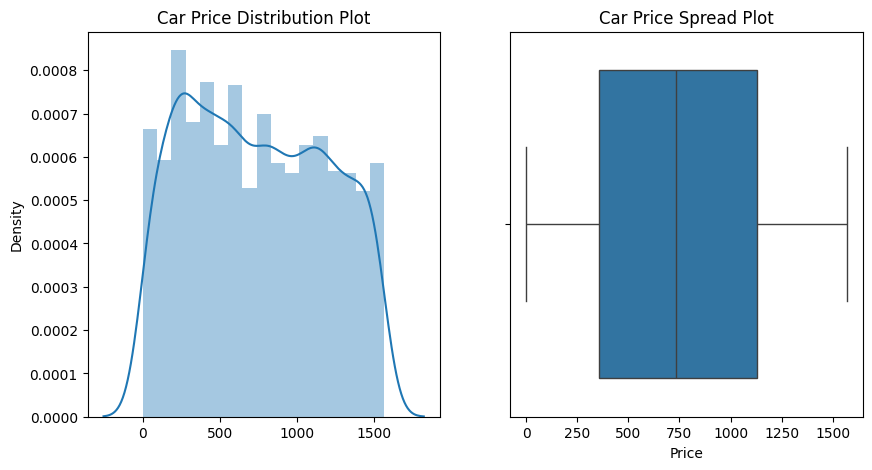

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sns.distplot(x=data.Price)

plt.subplot(1, 2, 2)
plt.title('Car Price Spread Plot')
sns.boxplot(x= data.Price)

plt.show()

In [ ]:
data.select_dtypes('object').columns

Index(['brand', 'model', 'Milage', 'fuel_type', 'engine', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

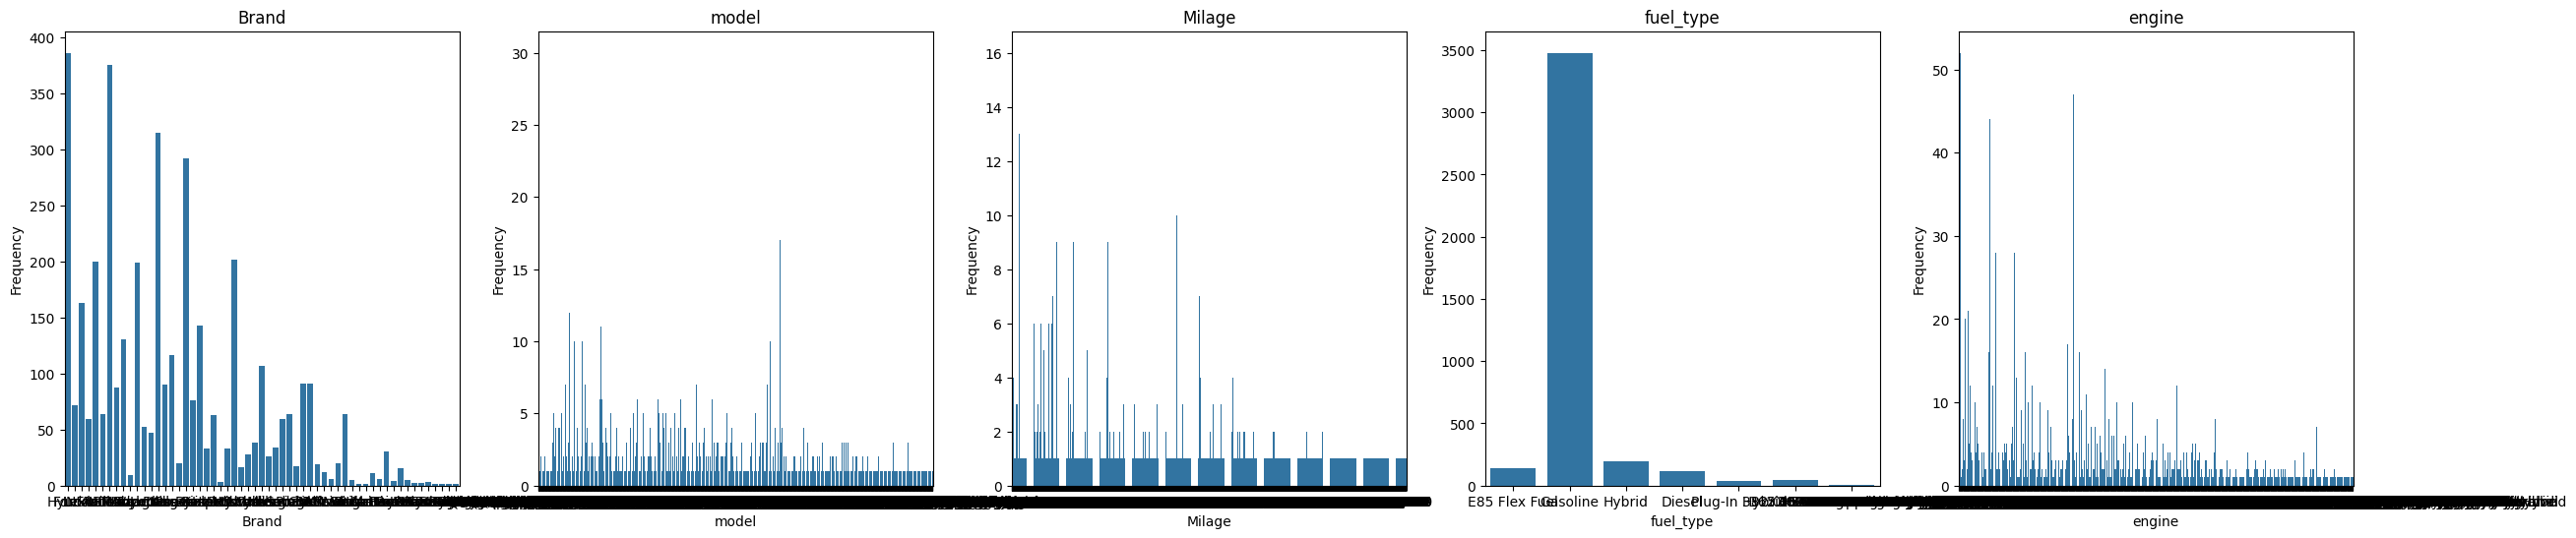

In [ ]:
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
plt.title("Brand")
plt.xlabel("Brand")
plt.ylabel("Frequency")
sns.countplot(x=data.brand)

plt.subplot(1,5,2)
plt.title("model")
plt.xlabel("model")
plt.ylabel("Frequency")
sns.countplot(x=data.model)

plt.subplot(1,5,3)
plt.title("Milage")
plt.xlabel("Milage")
plt.ylabel("Frequency")
sns.countplot(x=data.Milage)

plt.subplot(1,5,4)
plt.title("fuel_type")
plt.xlabel("fuel_type")
plt.ylabel("Frequency")
sns.countplot(x=data.fuel_type)

plt.subplot(1,5,5)
plt.title("engine")
plt.xlabel("engine")
plt.ylabel("Frequency")
sns.countplot(x=data.engine)



plt.show()



<Axes: title={'center': 'clean_title'}, xlabel='clean_title', ylabel='Frequency'>

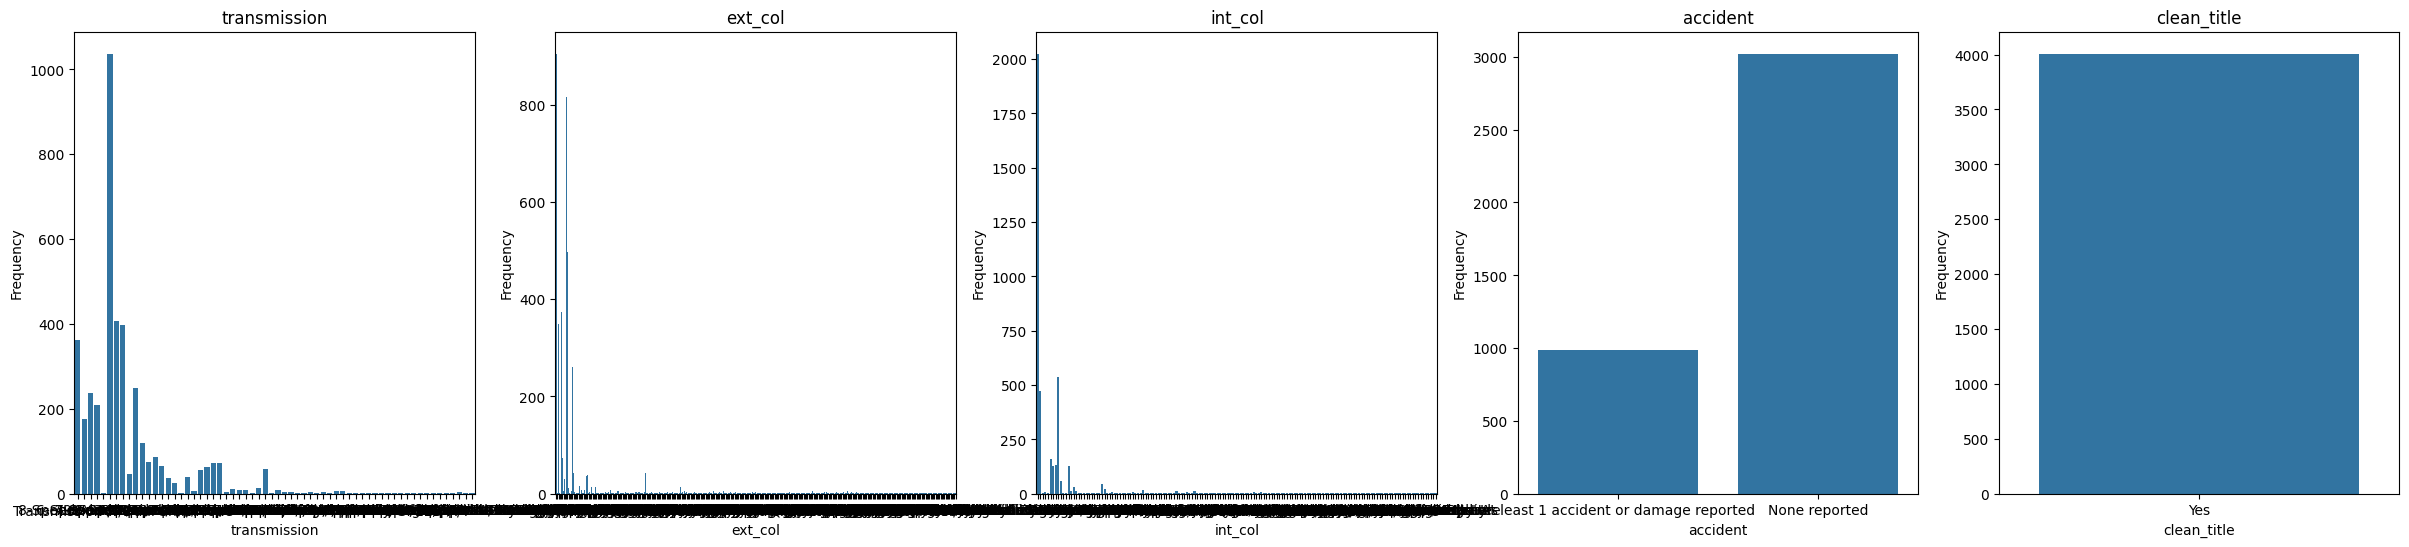

In [ ]:
plt.figure(figsize=(30,6))

plt.subplot(1,5,1)
plt.title("transmission")
plt.xlabel("transmission")
plt.ylabel("Frequency")
sns.countplot(x=data.transmission)

plt.subplot(1,5,2)
plt.title("ext_col")
plt.xlabel("ext_col")
plt.ylabel("Frequency")
sns.countplot(x=data.ext_col)

plt.subplot(1,5,3)
plt.title("int_col")
plt.xlabel("int_col")
plt.ylabel("Frequency")
sns.countplot(x=data.int_col)

plt.subplot(1,5,4)
plt.title("accident")
plt.xlabel("accident")
plt.ylabel("Frequency")
sns.countplot(x=data.accident)

plt.subplot(1,5,5)
plt.title("clean_title")
plt.xlabel("clean_title")
plt.ylabel("Frequency")
sns.countplot(x=data.clean_title)

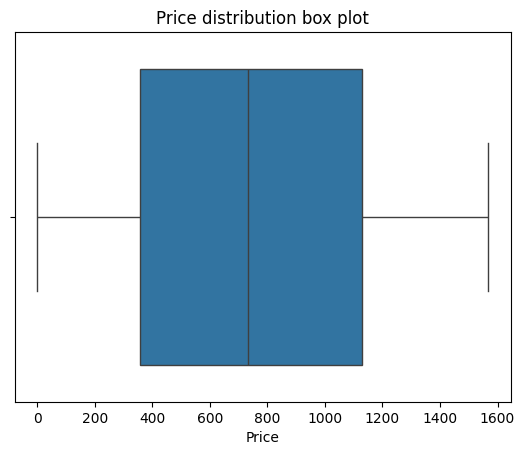

In [ ]:

plt.title("Price distribution box plot")
sns.boxplot(x=data.Price)
plt.show()

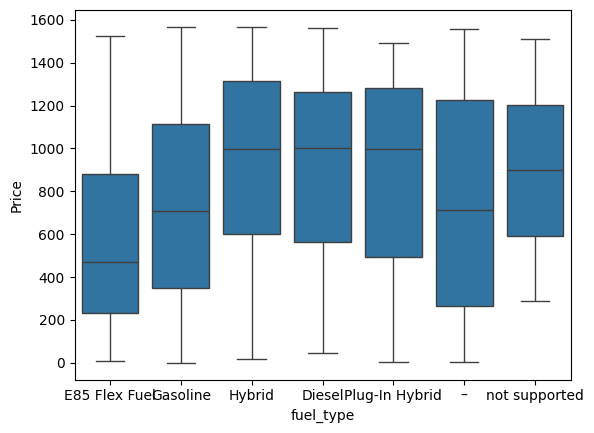

In [ ]:
sns.boxplot(x=data.fuel_type, y=data.Price)
plt.show()

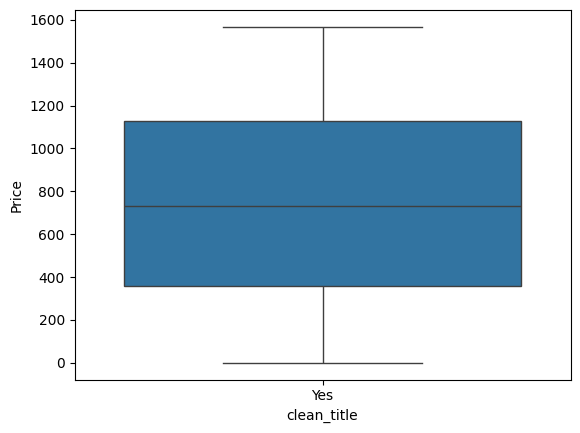

In [ ]:
#sns.boxplot(x=data.transmission, y=data.Price)
#ns.boxplot(x=data.ext_col, y=data.Price)
#sns.boxplot(x=data.int_col, y=data.Price)
#sns.boxplot(x=data.accident, y=data.Price)
sns.boxplot(x=data.clean_title, y=data.Price)

plt.show()

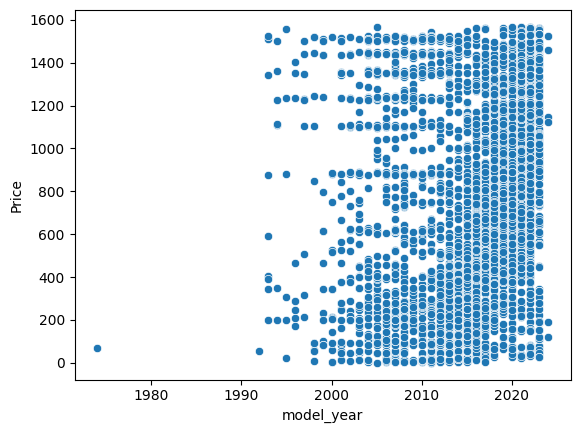

In [ ]:
sns.scatterplot(x=data.model_year, y=data.Price)
plt.show()

In [ ]:
X= data.drop('Price', axis=1)
y= data['Price']

In [ ]:
X.head(2)

,brand,model,model_year,Milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Ford,Utility Police Interceptor Base,2013,"51,000",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes
1,Hyundai,Palisade SEL,2021,"34,742",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes


In [ ]:
X = pd.get_dummies(X, columns= ['brand', 'model', 'Milage', 'fuel_type', 'engine', 'transmission','ext_col', 'int_col'], drop_first= True)
X.head()

,model_year,accident,clean_title,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,...,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–
0,2013,At least 1 accident or damage reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,At least 1 accident or damage reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,None reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,None reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,None reported,Yes,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.head()

,model_year,accident,clean_title,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,...,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–
0,2013,At least 1 accident or damage reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,At least 1 accident or damage reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,None reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,None reported,Yes,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,None reported,Yes,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.accident.replace({"At least 1 accident or damage reported":1, "None reported":0}, inplace=True)

/tmp/ipython-input-2410314278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.accident.replace({"At least 1 accident or damage reported":1, "None reported":0}, inplace=True)
/tmp/ipython-input-2410314278.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.accident.replace({"At least 1 

In [ ]:
data.accident.replace({1:"At least 1 accident or damage reported", 0:"None reported"}, inplace=True)

In [ ]:
data.clean_title.replace({1:"Yes", 0:""}, inplace=True)

/tmp/ipython-input-4019620200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.clean_title.replace({1:"Yes", 0:""}, inplace=True)


In [ ]:
X = pd.get_dummies(X, columns= ['accident','clean_title'], drop_first= True)
X.head()

,model_year,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported
0,2013,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2021,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(3006, 6457) (1003, 6457)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   Milage        4009 non-null   object
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  Price         4009 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 376.0+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
print("Train Accuracy:", r2_score(lr.predict(X_train), y_train))
print("Test Accuracy:", r2_score(lr.predict(X_test), y_test))

Train Accuracy: 1.0
Test Accuracy: -0.030349987973351977
